# Practice Geopandas
## Author: Sunny Kulkarni (skk456)

In [2]:
import pandas as pd
import numpy as np
import os
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import matplotlib.pylab as plt
%matplotlib inline

# Setup the Co-ordinate system and get Brooklyn Census Tract data

In [11]:
if not os.path.isdir(os.getenv("PUIDATA") + "/" + "nycb2010_16d"):
    print ("WARNING! nycb2010_16d files not found in location {}".format(os.getenv("PUIDATA")+"/"))
else:
    shape_path = os.getenv('PUIDATA') +'/'+ "nycb2010_16d/nycb2010.shp"
    ct_shape = GeoDataFrame.from_file(shape_path)
    ct_shape.to_crs(epsg=4326, inplace=True)
    

In [12]:
ct_shape_brooklyn = ct_shape[ct_shape.BoroName == 'Brooklyn']
ct_shape_brooklyn.reset_index(inplace=True)
ct_shape_brooklyn.drop('index', axis=1, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Create a point for CUSP location at 1 MetroTech, Jay Street, Brooklyn.

In [13]:
#longitude is east-west (i.e. X) and latitude is north-south (i.e. Y)
cusp = shapely.geometry.Point(-73.9866, 40.6931)

# Find location of CUSP within Brooklyn Census Tract and plot it

In [7]:
for i in xrange(len(ct_shape_brooklyn)):
    if not ct_shape_brooklyn.geometry[i].contains(cusp): continue
    else: break

cusp_index = i        
print 'CUSP is contained in {}'.format(ct_shape_brooklyn.geometry[cusp_index])

CUSP is contained in POLYGON ((-73.98622595691906 40.69308831343839, -73.98627231669103 40.6921947946671, -73.98729894947923 40.69223407543156, -73.98725396415627 40.69312490276504, -73.98622595691906 40.69308831343839))


In [8]:
cusp_ct = GeoDataFrame(ct_shape_brooklyn.iloc[cusp_index,:])

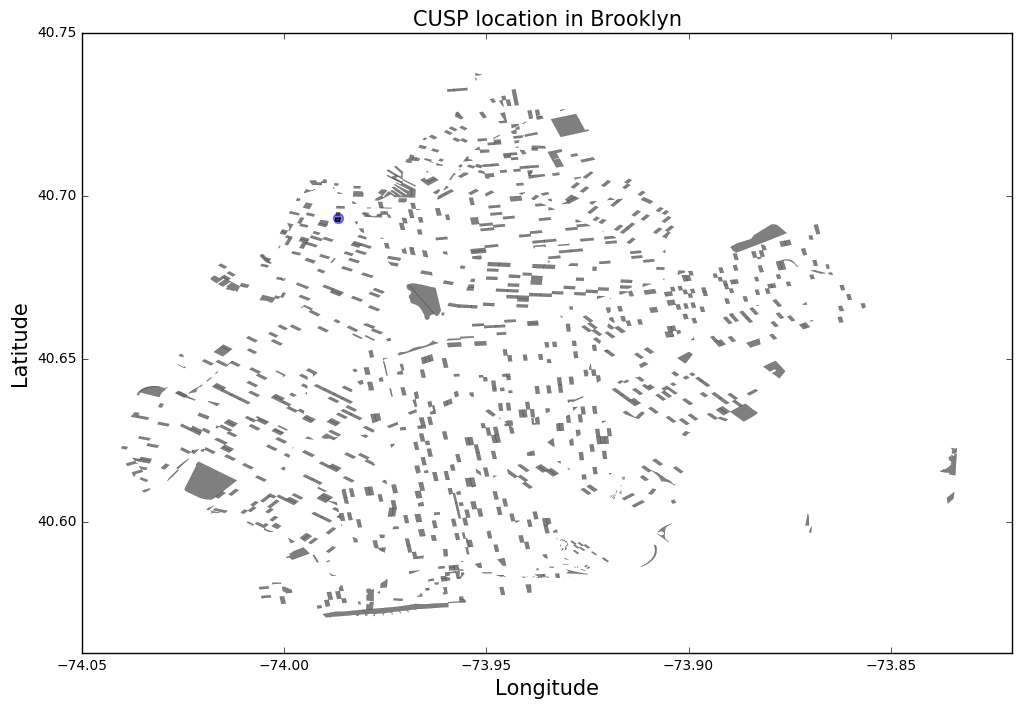

In [14]:
fig, ax = plt.subplots(1, figsize = (12,8))
ct_shape_brooklyn[::10].plot(ax=ax, color = 'black', linewidth=0.1)
cusp_ct.T.plot(ax=ax, color = 'black')
plt.scatter(cusp.x, cusp.y, color = 'blue', s =50, alpha= 0.5)
plt.xlim(-74.05, -73.82)
plt.ylim(40.56, 40.75)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
plt.title('CUSP location in Brooklyn', fontsize = 15)
plt.show()

### Figure1: The above map shows some census tracts of Brooklyn Borough.
#### Blue point shows the position of CUSP (1 Metrotech Center, Brooklyn). CUSP is located in the north east part of Brooklyn